# 弹性网络回归 其实就是 将L1与L2正则化项加入回归中

弹性网络回归的问题可以写为：
$$\min_{w, b} \; \frac{1}{n} \| y - (Xw + b) \|_2^2 + \alpha \left( \frac{1-\rho}{2} \| w \|_2^2 + \rho \| w \|_1 \right)$$

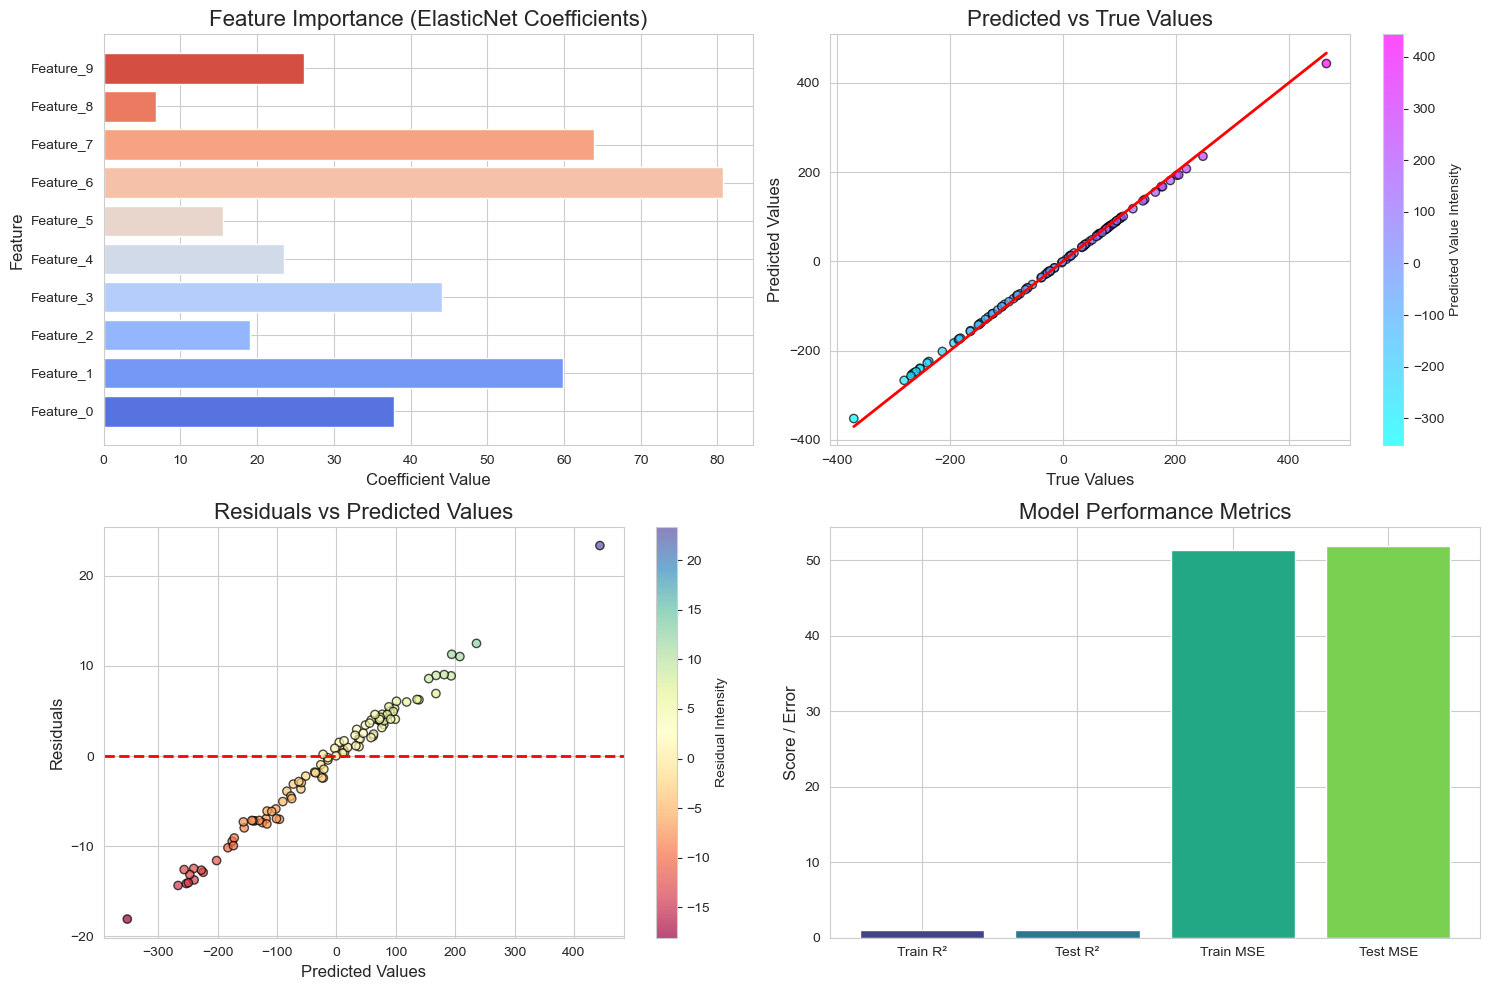

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 1. 生成模拟数据集
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)
X = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(10)])
y = pd.Series(y, name="Target")

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 弹性网络回归模型#  主要调节比例！
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# 5. 模型预测
y_pred_train = elastic_net.predict(X_train_scaled)
y_pred_test = elastic_net.predict(X_test_scaled)

# 6. 计算评价指标
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# 7. 可视化分析
plt.figure(figsize=(15, 10))

# 图 1: 特征重要性（回归系数）
plt.subplot(2, 2, 1)
coef = elastic_net.coef_
colors = sns.color_palette("coolwarm", len(coef))
plt.barh(X.columns, coef, color=colors)
plt.title('Feature Importance (ElasticNet Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# 图 2: 预测值与真实值的关系
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_test, c=y_pred_test, cmap='cool', alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs True Values', fontsize=16)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.colorbar(label="Predicted Value Intensity")

# 图 3: 预测残差图
plt.subplot(2, 2, 3)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, c=residuals, cmap='Spectral', alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.colorbar(label="Residual Intensity")

# 图 4: R^2 与 MSE 比较
plt.subplot(2, 2, 4)
metrics = ['Train R²', 'Test R²', 'Train MSE', 'Test MSE']
values = [r2_train, r2_test, mse_train, mse_test]
colors = sns.color_palette("viridis", len(metrics))
plt.bar(metrics, values, color=colors)
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Score / Error', fontsize=12)

plt.tight_layout()
plt.show()